## Test greedy EM vs SVD

In [1]:
import sys
sys.path.insert(0, 'C:\\Users\\gauthieca\\Desktop\\Code_ Thèse\\bandits-to-rank')

In [2]:
from bandits_to_rank.bandits import *
from bandits_to_rank.environment import *
from bandits_to_rank.referee import *
from bandits_to_rank.opponents import oracle,random_player,greedy,bc_mpts

from bandits_to_rank.sampling.pbm_inference import EM, SVD

import time
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import floor, log
from random import shuffle
from copy import deepcopy


%reload_ext autoreload
%autoreload 2 

In [3]:
def time_sec_to_HMS(sec):
    heure=sec//3600
    rest_h=sec%3600
    minute=rest_h//60
    rest_m=rest_h%60

    return(str(int(heure))+'H '+str(int(minute))+'min '+str(int(rest_m))+'sec')

## Teste EM

In [10]:
def simule_log_Pyclick(pbm_model, nb_sessions, thetas, kappas):
    nb_positions = len(kappas)
    nb_items = len(thetas)
    player = random_player.Random(nb_items, nb_positions)
    env = Environment_PBM(thetas, kappas)

    for t in range(nb_sessions) :
        propositions = player.choose_next_arm()
        rewards = env.get_reward(propositions)
        pbm_model.add_session(propositions,rewards)


In [12]:
thetas = [0.5, 0.7 ,0.2 ,0.8]
kappas = [1, 0.5, 0.7]
for nb_sessions in  [100, 1000, 10000]:
    print("with", nb_sessions, "sessions")
    pbm_model = EM(len(thetas), len(kappas))
    simule_log_Pyclick(pbm_model, nb_sessions, thetas, kappas)
    %time pbm_model.learn()
    thetas_hat, kappas_hat = pbm_model.get_params()
    print(np.sqrt(((thetas-thetas_hat)**2).mean()))
    print(thetas-thetas_hat)
    print(np.sqrt(((kappas-kappas_hat)**2).mean()))
    print(kappas-kappas_hat)
      

with 100 sessions
Wall time: 591 ms
0.11032195777972495
[ 0.12063253 -0.1721159  -0.05639827 -0.0364264 ]
0.12112043228997102
[0.09118201 0.13766658 0.1293995 ]
with 1000 sessions
Wall time: 4.17 s
0.0762567624935842
[-0.07618485 -0.12013562 -0.00704474 -0.05453484]
0.09762245633682029
[0.13230142 0.01301141 0.1044867 ]
with 10000 sessions
Wall time: 36.8 s
0.07783688642127204
[-0.0640943  -0.09312979 -0.0289427  -0.10303109]
0.09134418522307292
[0.11338304 0.06663143 0.08795351]


## Tests Egreedy

In [4]:
kappas_desord = [1,0.7,0.3,0.75,0.1]
thetas = [0.9,0.3,0.5,0.4,0.1,0.2,0.5,0.1,0.8,0.4]
nb_prop = len(thetas)  
nb_place = len(kappas_desord)

In [5]:
pas = 10
c = 100
env = Environment_PBM(thetas,kappas_desord)

 

player_d_Oracle = oracle.Oracle(env.get_best_index())
player_d_Random = random_player.Random(nb_prop,nb_place)



### Game 20 Trial 5000

In [6]:
nb_trial = 5000
nb_game = 20

referee_Oracle_5000trials_20games_desord = Referee(env,nb_trial)
referee_Random_5000trials_20games_desord = Referee(env,nb_trial)


referee_EGreedy_EM_n_MAJ_1_5000trials_20games_desord = Referee(env,nb_trial)
referee_EGreedy_SVD_n_MAJ_1_5000trials_20games_desord = Referee(env,nb_trial)

referee_greedy_EM_n_MAJ_1_5000trials_20games_desord = Referee(env,nb_trial)
referee_greedy_SVD_n_MAJ_1_5000trials_20games_desord = Referee(env,nb_trial)

referee_EGreedy_EM_n_MAJ_5_5000trials_20games_desord = Referee(env,nb_trial)
referee_EGreedy_SVD_n_MAJ_5_5000trials_20games_desord = Referee(env,nb_trial)
referee_greedy_EM_n_MAJ_5_5000trials_20games_desord = Referee(env,nb_trial)
referee_greedy_SVD_n_MAJ_5_5000trials_20games_desord = Referee(env,nb_trial)


referee_EGreedy_EM_n_MAJ_10_5000trials_20games_desord = Referee(env,nb_trial)
referee_EGreedy_SVD_n_MAJ_10_5000trials_20games_desord = Referee(env,nb_trial)
referee_greedy_EM_n_MAJ_10_5000trials_20games_desord = Referee(env,nb_trial)
referee_greedy_SVD_n_MAJ_10_5000trials_20games_desord = Referee(env,nb_trial)

In [7]:
####trop long
start = time.time()
  
for i in range(nb_game):
    #print ('#### game '+str(i))
    start_game = time.time()
    referee_Oracle_5000trials_20games_desord.play_game(player_d_Oracle)
    referee_Random_5000trials_20games_desord.play_game(player_d_Random)
end = time.time()   
print ('time :',time_sec_to_HMS(end-start)) 

time : 0H 0min 8sec


In [8]:
start = time.time()
  
for i in range(nb_game):
    #print ('#### game '+str(i))
    start_game = time.time()
    
    player_EGreedy_SVD_n_MAJ_1 =  greedy.greedy_EGreedy(c,nb_prop,nb_place,1)
    player_greedy_SVD_n_MAJ_1 =  greedy.greedy(nb_prop,nb_place,1)

    
    referee_EGreedy_SVD_n_MAJ_1_5000trials_20games_desord.play_game(player_EGreedy_SVD_n_MAJ_1)
    referee_greedy_SVD_n_MAJ_1_5000trials_20games_desord.play_game(player_greedy_SVD_n_MAJ_1)   
    end_game = time.time()   
    #print ('time_game :',time_sec_to_HMS(end_game-start_game))
end = time.time()   
print ('time :',time_sec_to_HMS(end-start)) 

time : 0H 1min 41sec


In [9]:
start = time.time()
  
for i in range(nb_game):
    #print ('#### game '+str(i))
    start_game = time.time()

    player_EGreedy_SVD_n_MAJ_5 =  greedy.greedy_EGreedy(c,nb_prop,nb_place,5)

    player_greedy_SVD_n_MAJ_5 =  greedy.greedy(nb_prop,nb_place,5)

    referee_EGreedy_SVD_n_MAJ_5_5000trials_20games_desord.play_game(player_EGreedy_SVD_n_MAJ_5)
    referee_greedy_SVD_n_MAJ_5_5000trials_20games_desord.play_game(player_greedy_SVD_n_MAJ_5)   
    end_game = time.time()   
    #print ('time_game :',time_sec_to_HMS(end_game-start_game))
end = time.time()   
print ('time :',time_sec_to_HMS(end-start)) 

time : 0H 0min 36sec


In [10]:
start = time.time()
  
for i in range(nb_game):
    #print ('#### game '+str(i))
    start_game = time.time()
    
    player_EGreedy_SVD_n_MAJ_10 =  greedy.greedy_EGreedy(c,nb_prop,nb_place,10)
    player_greedy_SVD_n_MAJ_10 =  greedy.greedy(nb_prop,nb_place,10)    
    
    referee_EGreedy_SVD_n_MAJ_10_5000trials_20games_desord.play_game(player_EGreedy_SVD_n_MAJ_10)
    referee_greedy_SVD_n_MAJ_10_5000trials_20games_desord.play_game(player_greedy_SVD_n_MAJ_10)   
    end_game = time.time()   
    #print ('time_game :',time_sec_to_HMS(end_game-start_game))
end = time.time()   
print ('time :',time_sec_to_HMS(end-start)) 

time : 0H 0min 31sec


In [11]:
referee_EGreedy_SVD_n_MAJ_1000_5000trials_20games_desord =  Referee(env,nb_trial)
referee_greedy_SVD_n_MAJ_1000_5000trials_20games_desord =  Referee(env,nb_trial)

start = time.time()
  
for i in range(nb_game):
    #print ('#### game '+str(i))
    start_game = time.time()
    player_EGreedy_SVD_n_MAJ_1000 =  greedy.greedy_EGreedy(c,nb_prop,nb_place,1000)
    player_greedy_SVD_n_MAJ_1000 =  greedy.greedy(nb_prop,nb_place,1000)
    
    start_Egreedy = time.time()
    referee_EGreedy_SVD_n_MAJ_1000_5000trials_20games_desord.play_game(player_EGreedy_SVD_n_MAJ_1000)
    end_Egreedy = time.time()   
    #print ('time_Egreedy :',time_sec_to_HMS(end_Egreedy-start_Egreedy))
    
    start_greedy= time.time()
    referee_greedy_SVD_n_MAJ_1000_5000trials_20games_desord.play_game(player_greedy_SVD_n_MAJ_1000)
    end_greedy = time.time()   
    #print ('time__greedy :',time_sec_to_HMS(end_greedy-start_greedy))
    
    end_game = time.time()   
    #print ('time_game :',time_sec_to_HMS(end_game-start_game))
end = time.time()   
print ('time :',time_sec_to_HMS(end-start)) 

time : 0H 0min 20sec


In [12]:
referee_EGreedy_SVD_n_MAJ_100_5000trials_20games_desord =  Referee(env,nb_trial)
referee_greedy_SVD_n_MAJ_100_5000trials_20games_desord =  Referee(env,nb_trial)

start = time.time()
  
for i in range(nb_game):
    #print ('#### game '+str(i))
    start_game = time.time()
    
    player_EGreedy_SVD_n_MAJ_100 =  greedy.greedy_EGreedy(c,nb_prop,nb_place,100)
    player_greedy_SVD_n_MAJ_100 =  greedy.greedy(nb_prop,nb_place,100)    
    
    referee_EGreedy_SVD_n_MAJ_100_5000trials_20games_desord.play_game(player_EGreedy_SVD_n_MAJ_100)
    referee_greedy_SVD_n_MAJ_100_5000trials_20games_desord.play_game(player_greedy_SVD_n_MAJ_100)   
    end_game = time.time()   
    #print ('time_game :',time_sec_to_HMS(end_game-start_game))
end = time.time()   
print ('time :',time_sec_to_HMS(end-start)) 

time : 0H 0min 22sec


In [ ]:
####trop long
start = time.time()
  
for i in range(nb_game):
    #print ('#### game '+str(i))
    start_game = time.time()
    
    player_EGreedy_EM_n_MAJ_1 =  greedy.greedy_EGreedy_EM(c,nb_prop,nb_place,1)

    player_greedy_EM_n_MAJ_1 =  greedy.greedy_EM(nb_prop,nb_place,1)

    
    print('Egreedy')
    start_Egreedy = time.time()
    referee_EGreedy_EM_n_MAJ_1_5000trials_20games_desord.play_game(player_EGreedy_EM_n_MAJ_1)
    end_Egreedy = time.time()   
    print ('time_Egreedy :',time_sec_to_HMS(end_Egreedy-start_Egreedy))
    print('greedy')
    start_greedy = time.time()
    referee_greedy_EM_n_MAJ_1_5000trials_20games_desord.play_game(player_greedy_EM_n_MAJ_1)
    end_greedy = time.time()   
    print ('time_greedy :',time_sec_to_HMS(end_greedy-start_Egreedy))
    
    end_game = time.time()   
    print ('time_game :',time_sec_to_HMS(end_game-start_game)) 
end = time.time()   
print ('time :',time_sec_to_HMS(end-start)) 

In [ ]:
start = time.time()
  
for i in range(nb_game):
    #print ('#### game '+str(i))

    player_EGreedy_EM_n_MAJ_5 =  greedy.greedy_EGreedy_EM(c,nb_prop,nb_place,5)
    player_greedy_EM_n_MAJ_5 =  greedy.greedy_EM(nb_prop,nb_place,5)
    
    start_game = time.time()
    referee_EGreedy_EM_n_MAJ_5_5000trials_20games_desord.play_game(player_EGreedy_EM_n_MAJ_5)
    referee_greedy_EM_n_MAJ_5_5000trials_20games_desord.play_game(player_greedy_EM_n_MAJ_5)   
    end_game = time.time()   
    print ('time_game :',time_sec_to_HMS(end_game-start_game))
end = time.time()   
print ('time :',time_sec_to_HMS(end-start)) 

In [10]:
start = time.time()
  
for i in range(nb_game):
    #print ('#### game '+str(i))
    start_game = time.time() 

    player_EGreedy_EM_n_MAJ_10 =  greedy.greedy_EGreedy_EM(c,nb_prop,nb_place,10)

    player_greedy_EM_n_MAJ_10 =  greedy.greedy_EM(nb_prop,nb_place,10)
 
    referee_EGreedy_EM_n_MAJ_10_5000trials_20games_desord.play_game(player_EGreedy_EM_n_MAJ_10)
    referee_greedy_EM_n_MAJ_10_5000trials_20games_desord.play_game(player_greedy_EM_n_MAJ_10)   
    end_game = time.time()   
    print ('time_game :',time_sec_to_HMS(end_game-start_game))
end = time.time()   
print ('time :',time_sec_to_HMS(end-start)) 

EGreedy (explore)trial n° 300
EGreedy (explore)trial n° 600
EGreedy (explore)trial n° 700
EGreedy (explore)trial n° 800
EGreedy (explore)trial n° 900
EGreedy (explore)trial n° 1000
EGreedy (explore)trial n° 1100
EGreedy (explore)trial n° 1200
EGreedy (explore)trial n° 1300
EGreedy (explore)trial n° 1400
EGreedy (explore)trial n° 1500
EGreedy (explore)trial n° 1600
EGreedy (explore)trial n° 1700
EGreedy (explore)trial n° 1800
EGreedy (explore)trial n° 1900
EGreedy (explore)trial n° 2000
EGreedy (explore)trial n° 2100
EGreedy (explore)trial n° 2200
EGreedy (explore)trial n° 2300
EGreedy (explore)trial n° 2400
EGreedy (explore)trial n° 2500
EGreedy (explore)trial n° 2600
EGreedy (explore)trial n° 2700
EGreedy (explore)trial n° 2800
EGreedy (explore)trial n° 2900
EGreedy (explore)trial n° 3000
EGreedy (explore)trial n° 3100
EGreedy (explore)trial n° 3200
EGreedy (explore)trial n° 3300
EGreedy (explore)trial n° 3400
EGreedy (explore)trial n° 3500
EGreedy (explore)trial n° 3600
EGreedy (expl

KeyboardInterrupt: 

In [16]:
referee_EGreedy_EM_n_MAJ_100_5000trials_20games_desord =  Referee(env,nb_trial)
referee_greedy_EM_n_MAJ_100_5000trials_20games_desord =  Referee(env,nb_trial)

start = time.time()
  
for i in range(nb_game):
    #print ('#### game '+str(i))
    start_game = time.time()
    player_EGreedy_EM_n_MAJ_100 =  greedy.greedy_EGreedy_EM(c,nb_prop,nb_place,100)
    player_greedy_EM_n_MAJ_100 =  greedy.greedy_EM(nb_prop,nb_place,100)
    
    start_Egreedy = time.time()
    referee_EGreedy_EM_n_MAJ_100_5000trials_20games_desord.play_game(player_EGreedy_EM_n_MAJ_100)
    end_Egreedy = time.time()   
    print ('time_Egreedy :',time_sec_to_HMS(end_Egreedy-start_Egreedy))
    
    start_greedy= time.time()
    referee_greedy_EM_n_MAJ_100_5000trials_20games_desord.play_game(player_greedy_EM_n_MAJ_100)
    end_greedy = time.time()   
    print ('time__greedy :',time_sec_to_HMS(end_greedy-start_greedy))
    
    end_game = time.time()   
    print ('time_game :',time_sec_to_HMS(end_game-start_game))
end = time.time()   
print ('time :',time_sec_to_HMS(end-start)) 

time_Egreedy : 0H 15min 51sec
time__greedy : 0H 14min 11sec
time_game : 0H 30min 2sec
time_Egreedy : 0H 13min 59sec
time__greedy : 0H 14min 53sec
time_game : 0H 28min 52sec
time_Egreedy : 0H 13min 19sec
time__greedy : 0H 14min 30sec
time_game : 0H 27min 50sec
time_Egreedy : 0H 13min 13sec
time__greedy : 0H 13min 41sec
time_game : 0H 26min 55sec
time_Egreedy : 0H 11min 19sec
time__greedy : 0H 12min 13sec
time_game : 0H 23min 33sec
time_Egreedy : 0H 11min 35sec
time__greedy : 0H 12min 18sec
time_game : 0H 23min 53sec
time_Egreedy : 0H 11min 24sec
time__greedy : 0H 12min 16sec
time_game : 0H 23min 40sec
time_Egreedy : 0H 11min 3sec
time__greedy : 0H 12min 19sec
time_game : 0H 23min 23sec
time_Egreedy : 0H 11min 33sec
time__greedy : 0H 9min 40sec
time_game : 0H 21min 13sec
time_Egreedy : 0H 7min 32sec
time__greedy : 0H 8min 34sec
time_game : 0H 16min 6sec
time_Egreedy : 0H 7min 41sec
time__greedy : 0H 8min 7sec
time_game : 0H 15min 48sec
time_Egreedy : 0H 7min 16sec
time__greedy : 0H 8min 

In [13]:
referee_EGreedy_EM_n_MAJ_1000_5000trials_20games_desord =  Referee(env,nb_trial)
referee_greedy_EM_n_MAJ_1000_5000trials_20games_desord =  Referee(env,nb_trial)

start = time.time()
  
for i in range(nb_game):
    print ('#### game '+str(i))
    start_game = time.time()
    player_EGreedy_EM_n_MAJ_1000 =  greedy.greedy_EGreedy_EM(c,nb_prop,nb_place,1000)
    player_greedy_EM_n_MAJ_1000 =  greedy.greedy_EM(nb_prop,nb_place,1000)
    
    start_Egreedy = time.time()
    referee_EGreedy_EM_n_MAJ_1000_5000trials_20games_desord.play_game(player_EGreedy_EM_n_MAJ_1000)
    end_Egreedy = time.time()   
    print ('time_Egreedy :',time_sec_to_HMS(end_Egreedy-start_Egreedy))
    
    start_greedy= time.time()
    referee_greedy_EM_n_MAJ_1000_5000trials_20games_desord.play_game(player_greedy_EM_n_MAJ_1000)
    end_greedy = time.time()   
    print ('time__greedy :',time_sec_to_HMS(end_greedy-start_greedy))
    
    end_game = time.time()   
    print ('time_game :',time_sec_to_HMS(end_game-start_game))
end = time.time()   
print ('time :',time_sec_to_HMS(end-start)) 

#### game 0
time_Egreedy : 0H 1min 24sec
time__greedy : 0H 2min 13sec
time_game : 0H 3min 38sec
#### game 1
time_Egreedy : 0H 1min 18sec
time__greedy : 0H 2min 8sec
time_game : 0H 3min 26sec
#### game 2
time_Egreedy : 0H 1min 25sec
time__greedy : 0H 2min 28sec
time_game : 0H 3min 53sec
#### game 3
time_Egreedy : 0H 1min 32sec
time__greedy : 0H 2min 28sec
time_game : 0H 4min 0sec
#### game 4
time_Egreedy : 0H 1min 27sec
time__greedy : 0H 2min 29sec
time_game : 0H 3min 57sec
#### game 5
time_Egreedy : 0H 1min 27sec
time__greedy : 0H 2min 27sec
time_game : 0H 3min 54sec
#### game 6
time_Egreedy : 0H 1min 17sec
time__greedy : 0H 2min 56sec
time_game : 0H 4min 14sec
#### game 7
time_Egreedy : 0H 1min 41sec
time__greedy : 0H 33min 49sec
time_game : 0H 35min 31sec
#### game 8
time_Egreedy : 0H 1min 39sec
time__greedy : 0H 3min 0sec
time_game : 0H 4min 39sec
#### game 9
time_Egreedy : 0H 1min 44sec
time__greedy : 0H 2min 59sec
time_game : 0H 4min 44sec
#### game 10
time_Egreedy : 0H 1min 50sec

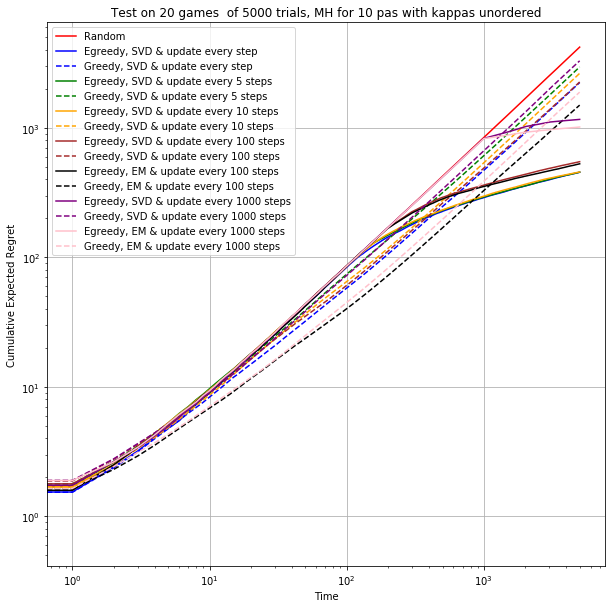

In [17]:
trials = [i for i in range(referee_Oracle_5000trials_20games_desord.nb_trials)]
plt.figure(figsize=(10, 10))

#plt.plot(trials, np.cumsum(referee_Oracle_5000trials_20games_desord.get_regret_expected(), axis=0)[trials], label='Oracle')
plt.plot(trials, np.cumsum(referee_Random_5000trials_20games_desord.get_regret_expected(), axis=0)[trials],'r-', label='Random')

#plt.plot(trials, np.cumsum(referee_EGreedy_EM_n_MAJ_1_5000trials_20games_desord.get_regret_expected(), axis=0)[trials], color = 'orange',linestyle ='-', label='Egreedy, EM & update every step')
#plt.plot(trials, np.cumsum(referee_greedy_EM_n_MAJ_1_5000trials_20games_desord.get_regret_expected(), axis=0)[trials], color = 'orange',linestyle ='--', label='Greedy, EM & update every step')

plt.plot(trials, np.cumsum(referee_EGreedy_SVD_n_MAJ_1_5000trials_20games_desord.get_regret_expected(), axis=0)[trials], color = 'b',linestyle ='-', label='Egreedy, SVD & update every step')
plt.plot(trials, np.cumsum(referee_greedy_SVD_n_MAJ_1_5000trials_20games_desord.get_regret_expected(), axis=0)[trials], color = 'b',linestyle ='--', label='Greedy, SVD & update every step')

#plt.plot(trials, np.cumsum(referee_EGreedy_EM_n_MAJ_5_5000trials_20games_desord.get_regret_expected(), axis=0)[trials], color = 'purple',linestyle ='-', label='Egreedy, EM & update every 5 steps')
#plt.plot(trials, np.cumsum(referee_greedy_EM_n_MAJ_5_5000trials_20games_desord.get_regret_expected(), axis=0)[trials], color = 'purple',linestyle ='--', label='Greedy, EM & update every 5 steps')

plt.plot(trials, np.cumsum(referee_EGreedy_SVD_n_MAJ_5_5000trials_20games_desord.get_regret_expected(), axis=0)[trials], color = 'g',linestyle ='-', label='Egreedy, SVD & update every 5 steps')
plt.plot(trials, np.cumsum(referee_greedy_SVD_n_MAJ_5_5000trials_20games_desord.get_regret_expected(), axis=0)[trials], color = 'g',linestyle ='--', label='Greedy, SVD & update every 5 steps')


plt.plot(trials, np.cumsum(referee_EGreedy_SVD_n_MAJ_10_5000trials_20games_desord.get_regret_expected(), axis=0)[trials], color = 'orange',linestyle ='-', label='Egreedy, SVD & update every 10 steps')
plt.plot(trials, np.cumsum(referee_greedy_SVD_n_MAJ_10_5000trials_20games_desord.get_regret_expected(), axis=0)[trials], color = 'orange',linestyle ='--', label='Greedy, SVD & update every 10 steps')


plt.plot(trials, np.cumsum(referee_EGreedy_SVD_n_MAJ_100_5000trials_20games_desord.get_regret_expected(), axis=0)[trials], color = 'brown',linestyle ='-', label='Egreedy, SVD & update every 100 steps')
plt.plot(trials, np.cumsum(referee_greedy_SVD_n_MAJ_100_5000trials_20games_desord.get_regret_expected(), axis=0)[trials], color = 'brown',linestyle ='--', label='Greedy, SVD & update every 100 steps')


plt.plot(trials, np.cumsum(referee_EGreedy_EM_n_MAJ_100_5000trials_20games_desord.get_regret_expected(), axis=0)[trials], color = 'black',linestyle ='-', label='Egreedy, EM & update every 100 steps')
plt.plot(trials, np.cumsum(referee_greedy_EM_n_MAJ_100_5000trials_20games_desord.get_regret_expected(), axis=0)[trials], color = 'black',linestyle ='--', label='Greedy, EM & update every 100 steps')


plt.plot(trials, np.cumsum(referee_EGreedy_SVD_n_MAJ_1000_5000trials_20games_desord.get_regret_expected(), axis=0)[trials], color = 'purple',linestyle ='-', label='Egreedy, SVD & update every 1000 steps')
plt.plot(trials, np.cumsum(referee_greedy_SVD_n_MAJ_1000_5000trials_20games_desord.get_regret_expected(), axis=0)[trials], color = 'purple',linestyle ='--', label='Greedy, SVD & update every 1000 steps')

plt.plot(trials, np.cumsum(referee_EGreedy_EM_n_MAJ_1000_5000trials_20games_desord.get_regret_expected(), axis=0)[trials], color = 'pink',linestyle ='-', label='Egreedy, EM & update every 1000 steps')
plt.plot(trials, np.cumsum(referee_greedy_EM_n_MAJ_1000_5000trials_20games_desord.get_regret_expected(), axis=0)[trials], color = 'pink',linestyle ='--', label='Greedy, EM & update every 1000 steps')


plt.xlabel('Time')
plt.ylabel('Cumulative Expected Regret')
plt.title ('Test on '+ str(nb_game) + ' games  of '+ str(nb_trial)+' trials, MH for '+str(pas)+' pas with kappas unordered')
plt.legend()
plt.grid(True)
plt.loglog()
plt.show()
  

### write log 

In [18]:
pwd

'C:\\Users\\gauthieca\\Desktop\\Code_ Thèse\\bandits-to-rank\\Test\\interaction'

In [20]:
cd result\eval_TSMH_greedy_EM

C:\Users\gauthieca\Desktop\Code_ Thèse\bandits-to-rank\Test\interaction\result\eval_TSMH_greedy_EM


In [21]:

with open('referee_Oracle_5000trials_20games.txt', 'w') as file:
    json.dump(referee_Oracle_5000trials_20games_desord.record_results, file)
with open('referee_Random_5000trials_20games_desord.txt', 'w') as file:
    json.dump(referee_Random_5000trials_20games_desord.record_results, file)
    
with open('referee_EGreedy_EM_n_MAJ_100_5000trials_20games_desord.txt', 'w') as file:
    json.dump(referee_EGreedy_EM_n_MAJ_100_5000trials_20games_desord.record_results, file)
with open('referee_greedy_EM_n_MAJ_100_5000trials_20games_desord.txt', 'w') as file:
    json.dump(referee_greedy_EM_n_MAJ_100_5000trials_20games_desord.record_results, file)
with open('referee_EGreedy_EM_n_MAJ_1000_5000trials_20games_desord.txt', 'w') as file:
    json.dump(referee_EGreedy_EM_n_MAJ_1000_5000trials_20games_desord.record_results, file)
with open('referee_greedy_EM_n_MAJ_1000_5000trials_20games_desord.txt', 'w') as file:
    json.dump(referee_greedy_EM_n_MAJ_1000_5000trials_20games_desord.record_results, file)
